In [39]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv('u.data', sep='\t', names=['user_id','item_id','rating','titmestamp'])

In [41]:
df.head()

,user_id,item_id,rating,titmestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [42]:
movie_titles = pd.read_csv('u.item', sep='|')


df1 = movie_titles.iloc[:,0:2]

df1.columns = ['item_id', 'Title']
#df1.rename(columns={'1': 'item_id', 'ToyStory(1995)': 'newName2'}, inplace=True)

df1.head()


,item_id,Title
0,2,GoldenEye (1995)
1,3,Four Rooms (1995)
2,4,Get Shorty (1995)
3,5,Copycat (1995)
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...


In [43]:
df = pd.merge(df, df1, on='item_id')
df.head()

,user_id,item_id,rating,titmestamp,Title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [44]:
df.describe()

,user_id,item_id,rating,titmestamp
count,99551.000000,99551.000000,99551.000000,9.955100e+04
mean,462.404858,427.448403,3.528282,8.835321e+08
std,266.589714,330.305983,1.126281,5.343992e+06
min,0.000000,2.000000,1.000000,8.747247e+08
25%,254.000000,176.000000,3.000000,8.794488e+08
50%,447.000000,323.000000,4.000000,8.828272e+08
75%,682.000000,633.000000,4.000000,8.882664e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


In [45]:
ratings = pd.DataFrame(df.groupby('Title')['rating'].mean())
ratings.head()

,rating
Title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [46]:
ratings['number_of_ratings'] = df.groupby('Title')['rating'].count()
ratings.head()

,rating,number_of_ratings
Title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


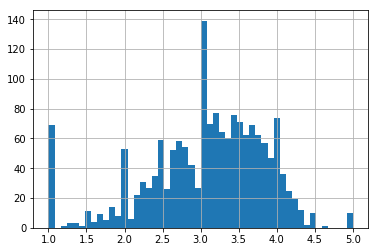

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)

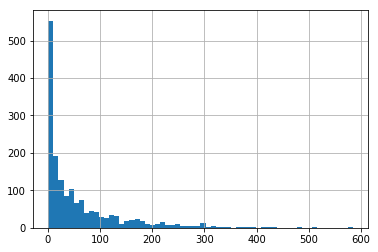

In [48]:
ratings['number_of_ratings'].hist(bins=60)

/Users/garvitjain/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/garvitjain/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


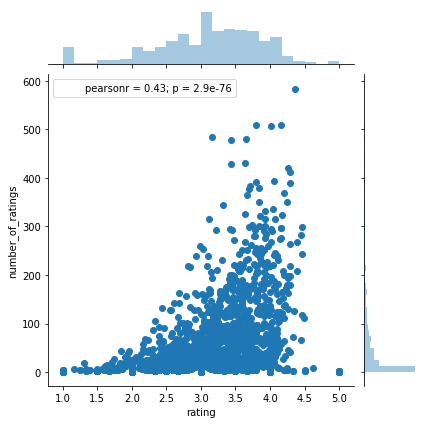

In [49]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

In [51]:
movie_matrix = df.pivot_table(index='user_id', columns='Title', values='rating')
movie_matrix.head()

Title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,¡ kˆldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
Title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Air Force One (1997),3.631090,431
Independence Day (ID4) (1996),3.438228,429


In [53]:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']

In [54]:
AFO_user_rating.head()
contact_user_rating.head()

user_id
0    NaN
1    5.0
2    3.0
3    2.0
4    5.0
Name: Contact (1997), dtype: float64

In [55]:
similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)

In [56]:
similar_to_air_force_one.head()

Title
'Til There Was You (1997)    0.867722
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.221943
12 Angry Men (1957)          0.228031
187 (1997)                   0.294232
dtype: float64

In [57]:
similar_to_contact = movie_matrix.corrwith(contact_user_rating)

In [58]:
similar_to_contact.head()

Title
'Til There Was You (1997)    0.904534
1-900 (1994)                      NaN
101 Dalmatians (1996)       -0.108441
12 Angry Men (1957)          0.022265
187 (1997)                   0.135512
dtype: float64

In [59]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
Title,
'Til There Was You (1997),0.867722
101 Dalmatians (1996),0.221943
12 Angry Men (1957),0.228031
187 (1997),0.294232
2 Days in the Valley (1996),0.043847


In [60]:
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()

,Correlation,number_of_ratings
Title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [61]:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
Title,,
Air Force One (1997),1.000000,431
"Hunt for Red October, The (1990)",0.554383,227
"Firm, The (1993)",0.526743,151
Murder at 1600 (1997),0.514906,218
Eraser (1996),0.500606,206
Absolute Power (1997),0.497411,127
"Rock, The (1996)",0.493542,378
"Long Kiss Goodnight, The (1996)",0.490233,185
Crimson Tide (1995),0.481205,154


In [62]:
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,number_of_ratings
Title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
Sneakers (1992),0.377275,150
"Firm, The (1993)",0.376987,151
Arsenic and Old Lace (1944),0.373759,115
Outbreak (1995),0.358015,104
